# Haberman's Survival Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
haberman = pd.read_csv('data/haberman.csv')

In [4]:
haberman.shape

(306, 4)

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 10, "display.max_columns", 10): 
        display(df)

In [6]:
display_all(haberman)

,Age,Op_Year,axii_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [7]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age            306 non-null int64
Op_Year        306 non-null int64
axii_nodes     306 non-null int64
Surv_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [8]:
# mapped: 1 as alive, 2 as dead
haberman['Surv_status'] = haberman['Surv_status'].map({1:'alive', 2:'dead'}).astype(str)

In [9]:
haberman.describe()

,Age,Op_Year,axii_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [10]:
haberman['Surv_status'].value_counts()

alive    225
dead      81
Name: Surv_status, dtype: int64

In [11]:
haberman['Surv_status'].value_counts(normalize=True)

alive    0.735294
dead     0.264706
Name: Surv_status, dtype: float64

**Observations**
- Total obervations: 306
- This dataset is unbalanced with approx 73% patients alive and rest dead
- The patients are aged between 30 to 83 with median 52
- Max no. of axii nodes observed is 52
- 75% of the patients have less than 5 axii nodes and 25% of the pateints have no nodes 

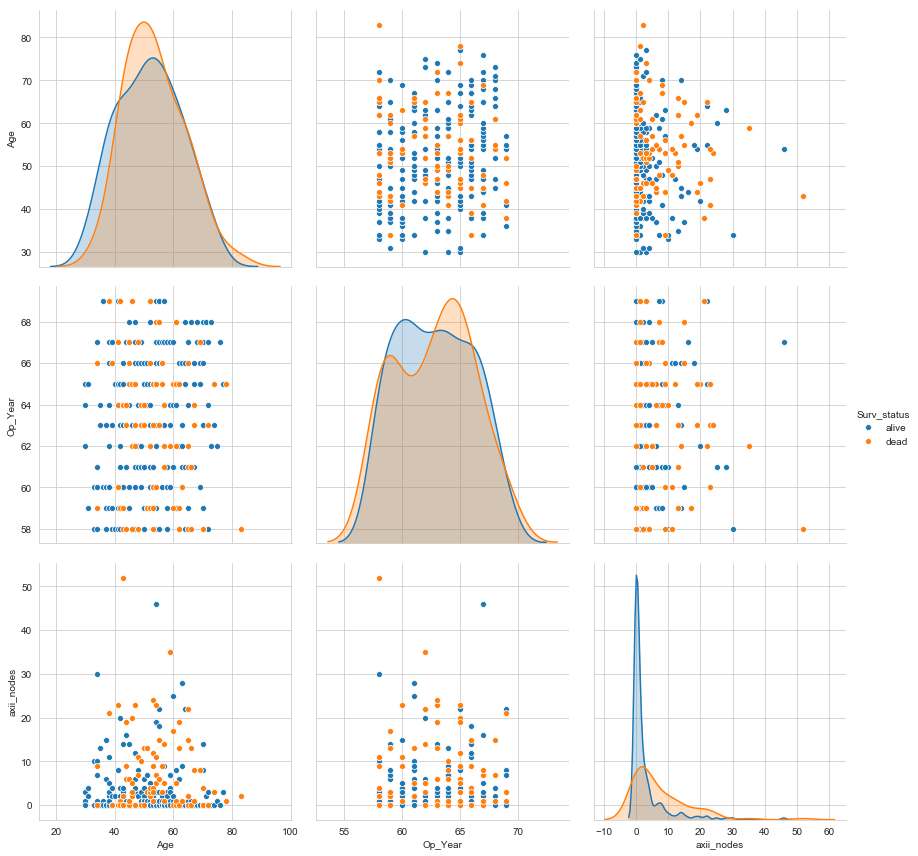

In [12]:
# pair plot
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_status", height=4);
plt.show()

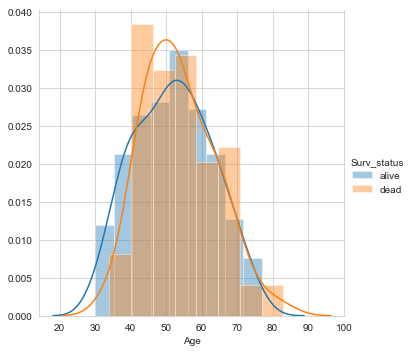

In [13]:
sns.FacetGrid(haberman, hue="Surv_status", height=5) \
    .map(sns.distplot,"Age").add_legend();
plt.show()

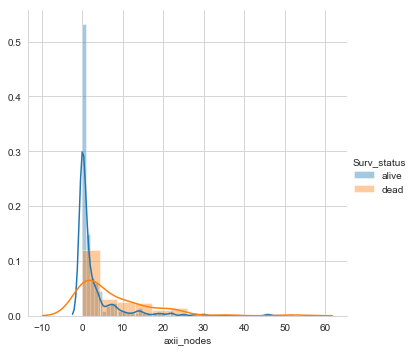

In [14]:
sns.FacetGrid(haberman, hue="Surv_status", height=5) \
    .map(sns.distplot, "axii_nodes").add_legend();
plt.show()

In [15]:
haberman[['Surv_status', 'axii_nodes']].groupby(['Surv_status'], as_index=False).mean()

,Surv_status,axii_nodes
0,alive,2.791111
1,dead,7.456790


In [16]:
haberman[['Surv_status', 'axii_nodes']].groupby(['Surv_status'], as_index=False).median()

,Surv_status,axii_nodes
0,alive,0
1,dead,4


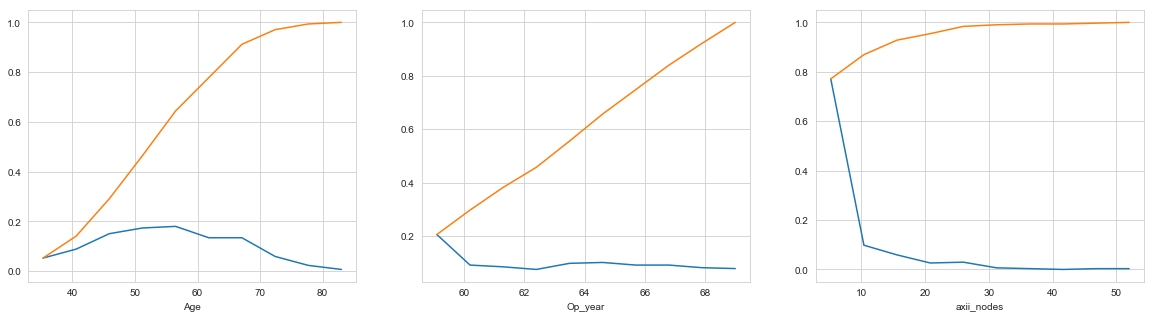

In [17]:
# CDF Plot for various attributes
plt.figure(figsize=(20,5))

# Age
plt.subplot(1,3,1)
counts, bin_edges = np.histogram(haberman['Age'], bins=10, density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')

# Op_year
plt.subplot(1,3,2)
counts, bin_edges = np.histogram(haberman['Op_Year'], bins=10, density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Op_year')

# axii_nodes
plt.subplot(1,3,3)
counts, bin_edges = np.histogram(haberman['axii_nodes'], bins=10, density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('axii_nodes')

plt.show()

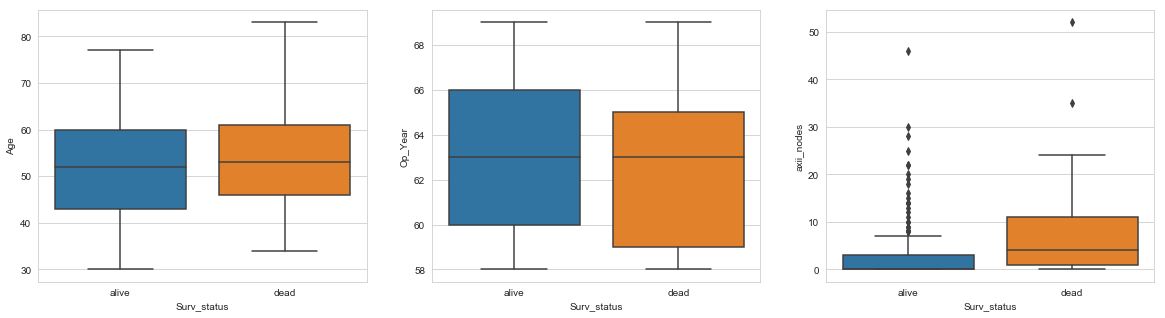

In [18]:
# Box-plot for various attributes
plt.figure(figsize=(20,5))

# Age
plt.subplot(1,3,1)
sns.boxplot(x='Surv_status', y='Age', data=haberman);

# Op_Year
plt.subplot(1,3,2)
sns.boxplot(x='Surv_status', y='Op_Year', data=haberman);

# axii_nodes
plt.subplot(1,3,3)
sns.boxplot(x='Surv_status', y='axii_nodes', data=haberman);

plt.show()

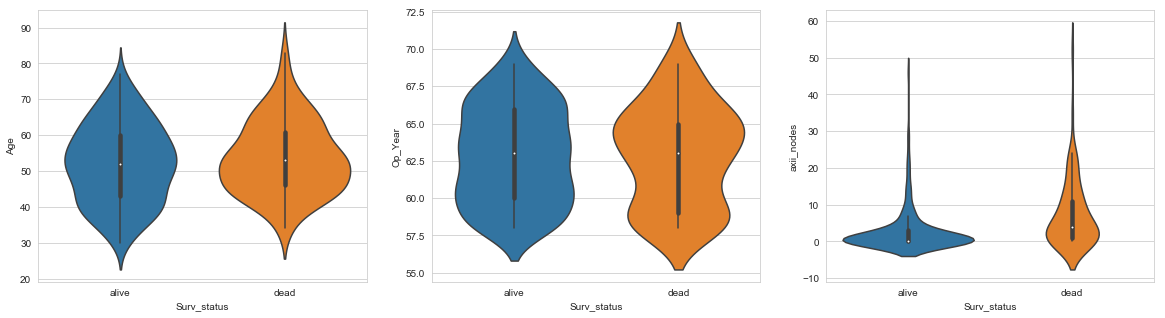

In [19]:
# Violin-plot for various attributes
plt.figure(figsize=(20,5))

# Age
plt.subplot(1,3,1)
sns.violinplot(x='Surv_status', y='Age', data=haberman);

# Op_Year
plt.subplot(1,3,2)
sns.violinplot(x='Surv_status', y='Op_Year', data=haberman);

# axii_nodes
plt.subplot(1,3,3)
sns.violinplot(x='Surv_status', y='axii_nodes', data=haberman);

plt.show()

**Observations**
- The number of positive axii nodes of the survivors is highly densed from 0 to 5.
- Almost 80% of the patients have less than or equal to 5 positive axii nodes.
- The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.